In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = [12, 7]
matplotlib.rcParams['text.usetex'] = False



ModuleNotFoundError: No module named 'numpy'

In [83]:
h = 0.005
tau1 = tau2 = tau = 0.1
sigma = 10.0
rho1 = -1.0
rho2 = 0.0
rho3 = 1.0
T = 50000

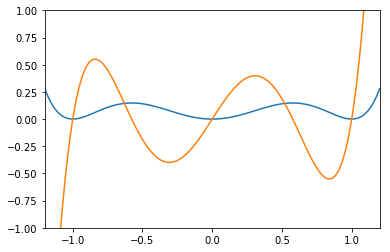

In [4]:
u = 0.0
v = 0.0
w = 0.0
phi = lambda rho: (rho - rho1)**2*(rho - rho2)**2*(rho - rho3)**2 + u*(rho - rho1)**2 + v*(rho - rho2)**2 + w*(rho - rho3)**2
dphi = lambda rho: 2.0*(rho - rho1)*(rho - rho2)*(rho - rho3)*((rho - rho1)*(rho - rho2) + (rho - rho1)*(rho -rho3) +
                    (rho - rho2)*(rho - rho3)) + 2.0*u*(rho - rho1) + 2.0*v*(rho - rho2) + 2.0*w*(rho - rho3) 
rho = np.linspace(-1.2, 1.2, 100)

plt.plot(rho, phi(rho))
plt.plot(rho, dphi(rho))
plt.axis([-1.2, 1.2, -1, 1])
plt.show()

Biffurcation diagram for the emergence of bouting with two motivations

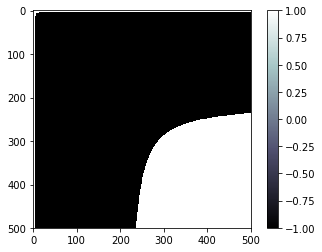

In [74]:

def Delta( mu1, mu2, sigma ):
    alpha = np.exp(-sigma)/(mu1 + np.exp(-sigma))
    beta = np.exp(-sigma)/(mu2 + np.exp(-sigma))
    es = np.exp(-sigma)

    p = mu1 + es
    q = mu2 + es
    r = sigma*(1 - beta)*es
    s = sigma*(1 - alpha)*es

    a = -1.0
    b = -(p + q - alpha - beta)
    c = -(p*q + r + s - (p + q)*(alpha + beta))
    d = -(p*r + s*q -  p*q*(alpha + beta))

    Q = lambda x: +a*x**3 + b*x**2 + c*x + d

    vDelta = (4.0*(b**2 - 3.0*a*c)**3 - (2.0*b**3 - 9.0*a*b*c + 27.0*a**2*d)**2)/(27.0*a**2)
    return vDelta

N = 500
mu1 = mu2 = np.linspace(np.exp(-sigma), 0.1, N)
D = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        D[i,j] = Delta(mu1[i], mu2[j], sigma )

plt.imshow(np.sign(D), cmap='bone')
plt.colorbar()
plt.show()

Simulation of the bouting with three moivations

In [3]:
def integrate( f, T, x0 ):
    X = np.zeros((len(x0), T))
    time = np.zeros(T)
    X[:,0] = x0

    for i in range(T-1):
        k1 = f(time[i], X[:,i])
        k2 = f(time[i] + h/2.0, X[:,i] + h*k1/2.0)
        k3 = f(time[i] + h/2.0, X[:,i] + h*k2/2.0)
        k4 = f(time[i] + h, X[:,i] + h*k3)
        X[:, i+1] = X[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6.0
        time[i+1] = time[i] + h
        
    return time, X

In [3]:
h = 0.005
tau1 = tau2 = tau = 7.777777777777778
sigma =  10.0
rho1 = -1.0
rho2 = 0.0
rho3 = 1.0
T = 1000

b = 1.0

f = lambda t, x: np.array([-tau*x[0] + (1.0 - x[0])*np.exp(-sigma*(x[3] - rho1)**2),
                  -tau*x[1] + (1.0 - x[1])*np.exp(-sigma*(x[3] - rho2)**2),
                  -tau*x[2] + (1.0 - x[2])*np.exp(-sigma*(x[3] - rho3)**2),
                  -1.0*(2.0*(x[3] - rho1)*(x[3] - rho2)*(x[3] - rho3)*((x[3] - rho1)*(x[3] - rho2) + (x[3] - rho1)*(x[3] -rho3) +
                    (x[3] - rho2)*(x[3] - rho3)) + 2.0*(1.0 - x[0])*(x[3] - rho1) + 2.0*(1.0 - x[1])*(x[3] - rho2) + 2.0*(1.0 - x[2])*(x[3] - rho3))])

t, X = integrate( f, T, [1.0, 0.0, 1.0, -1.0] )

ax[0].plot(t, X[0,:])
ax[0].plot(t, X[1,:])
ax[0].plot(t, X[2,:])

ax[1].plot(t, X[3,:])
plt.show()

NameError: name 'integrate' is not defined

Plotting the potential

In [ ]:
x1 = 0.5
x2 = 1.0
x3 = 0.0
fig, ax = plt.subplots(2, 1)
P = lambda x: -(2.0*(x - rho1)*(x - rho2)*(x - rho3)*((x - rho1)*(x - rho2) + (x - rho2)*(x - rho3) + (x - rho1)*(x - rho3)) +
                2.0*(1.0 - x1)*(x - rho1) + 2.0*(1.0 - x2)*(x - rho2) + 2.0*(1.0 - x3)*(x - rho3))

a = rho1 + rho2 + rho3
b = rho1*rho2 + rho2*rho3 + rho1*rho3
c = rho1*rho2*rho3
Q = lambda x: -(6.0*x**5 - 10.0*a*x**4 + 2.0*(4.0*b + 2.0*a**2)*x**3 - 2.0*(3.0*a*b + 3.0*c)*x**2 + 2.0*(b**2 + 2.0*c*a)*x + 2.0*b*c +
               2.0*(1.0 - x1)*(x - rho1) + 2.0*(1.0 - x2)*(x - rho2) + 2.0*(1.0 - x3)*(x - rho3))
print P(0.0)
print Q(0.0)

In [64]:
N = 100
mu = np.linspace(0, 10, N)

sigma = np.linspace(0, 40, N)

def hasImag(mu1, mu2, mu3, sigma):
   
    es = np.exp(-sigma)   
    alpha = es/(mu1 + es)
    beta = 1.0/(mu2 + 1.0)
    gamma = es/(mu3 + es)
    

    A = np.array([[-(mu1 + es), 0.0, 0.0, -2.0*sigma*(1.0 - alpha)*es],
                  [0.0, -(mu2 + 1.0), 0.0, 0.0],
                  [0.0, 0.0, -(mu3 + es), 2.0*sigma*(1.0 - gamma)*es],
                  [2.0, 0.0, -2.0, -8.0 + 2.0*alpha + 2.0*beta + 2.0*gamma]])

    w, v = np.linalg.eig(A)
    if np.any(np.abs(np.imag(w)) > 0):
        print w
    return np.any(np.abs(np.imag(w)) > 0)
       
for j in range(N):
    for i in range(N):
        mu1 = mu2 = mu3 = mu[i]

        if hasImag(mu1, mu2, mu3, sigma[j]):
            print "mu: ", mu1
            print "sigma: ", sigma[j]


[-5.62607172+0.27440169j -5.62607172-0.27440169j -4.30398078+0.j
 -4.63636364+0.j        ]
mu:  3.6363636363636362
sigma:  0.40404040404040403
[-5.68828951+0.4290001j -5.68828951-0.4290001j -4.40499088+0.j
 -4.73737374+0.j       ]
mu:  3.7373737373737375
sigma:  0.40404040404040403
[-5.74999634+0.53916936j -5.74999634-0.53916936j -4.50600098+0.j
 -4.83838384+0.j        ]
mu:  3.8383838383838382
sigma:  0.40404040404040403
[-5.81122497+0.62857542j -5.81122497-0.62857542j -4.60701109+0.j
 -4.93939394+0.j        ]
mu:  3.9393939393939394
sigma:  0.40404040404040403
[-5.87200541+0.70504478j -5.87200541-0.70504478j -4.70802119+0.j
 -5.04040404+0.j        ]
mu:  4.040404040404041
sigma:  0.40404040404040403
[-5.93236522+0.77233137j -5.93236522-0.77233137j -4.80903129+0.j
 -5.14141414+0.j        ]
mu:  4.141414141414141
sigma:  0.40404040404040403
[-5.99232973+0.83258022j -5.99232973-0.83258022j -4.91004139+0.j
 -5.24242424+0.j        ]
mu:  4.242424242424242
sigma:  0.40404040404040403
[-6.0

mu:  7.171717171717171
sigma:  2.0202020202020203
[-7.54597919+1.44406687j -7.54597919-1.44406687j -7.40535594+0.j
 -8.27272727+0.j        ]
mu:  7.2727272727272725
sigma:  2.0202020202020203
[-7.59842438+1.44815258j -7.59842438-1.44815258j -7.50636604+0.j
 -8.37373737+0.j        ]
mu:  7.373737373737374
sigma:  2.0202020202020203
[-7.65082202+1.45059848j -7.65082202-1.45059848j -7.60737614+0.j
 -8.47474747+0.j        ]
mu:  7.474747474747475
sigma:  2.0202020202020203
[-7.70317382+1.45140829j -7.70317382-1.45140829j -7.70838624+0.j
 -8.57575758+0.j        ]
mu:  7.575757575757575
sigma:  2.0202020202020203
[-7.75548145+1.45058037j -7.75548145-1.45058037j -7.80939635+0.j
 -8.67676768+0.j        ]
mu:  7.6767676767676765
sigma:  2.0202020202020203
[-7.80774647+1.44810773j -7.80774647-1.44810773j -7.91040645+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  2.0202020202020203
[-7.85997037+1.44397792j -7.85997037-1.44397792j -8.01141655+0.j
 -8.87878788+0.j        ]
mu:  7.8787

[-8.03672852+0.59201085j -8.03672852-0.59201085j -8.29457191+0.j
 -9.28282828+0.j        ]
mu:  8.282828282828282
sigma:  4.444444444444445
[-8.08842723+0.56799922j -8.08842723-0.56799922j -8.39558201+0.j
 -9.38383838+0.j        ]
mu:  8.383838383838384
sigma:  4.444444444444445
[-8.14010043+0.53841229j -8.14010043-0.53841229j -8.49659211+0.j
 -9.48484848+0.j        ]
mu:  8.484848484848484
sigma:  4.444444444444445
[-8.19174893+0.5022589j -8.19174893-0.5022589j -8.59760221+0.j
 -9.58585859+0.j       ]
mu:  8.585858585858587
sigma:  4.444444444444445
[-8.24337351+0.45797941j -8.24337351-0.45797941j -8.69861232+0.j
 -9.68686869+0.j        ]
mu:  8.686868686868687
sigma:  4.444444444444445
[-8.2949749 +0.40289561j -8.2949749 -0.40289561j -8.79962242+0.j
 -9.78787879+0.j        ]
mu:  8.787878787878787
sigma:  4.444444444444445
[-8.34655383+0.33165814j -8.34655383-0.33165814j -8.90063252+0.j
 -9.88888889+0.j        ]
mu:  8.88888888888889
sigma:  4.444444444444445
[-8.39811098+0.22968686j

sigma:  11.717171717171716
[-7.77496616+0.02280029j -7.77496616-0.02280029j -7.77778322+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  12.121212121212121
[-7.77496572+0.01887268j -7.77496572-0.01887268j -7.77778141+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  12.525252525252524
[-7.77496543+0.01558852j -7.77496543-0.01558852j -7.7777802 +0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  12.929292929292929
[-7.77496523+0.0128389j -7.77496523-0.0128389j -7.7777794 +0.j
 -8.77777778+0.j       ]
mu:  7.777777777777778
sigma:  13.333333333333334
[-7.7749651 +0.01053154j -7.7749651 -0.01053154j -7.77777886+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  13.737373737373737
[-7.77496501+0.00858784j -7.77496501-0.00858784j -7.7777785 +0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  14.141414141414142
[-7.77496496+0.00694011j -7.77496496-0.00694011j -7.77777826+0.j
 -8.77777778+0.j        ]
mu:  7.777777777777778
sigma:  14.54545